In [1]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
# from skimage import io 
import rasterio
import fiona
import rasterio.mask
from rasterio.plot import show_hist
# import subprocess as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import datetime

import fiona
import rasterio
import rasterio.mask
import rasterio.plot
from descartes import PolygonPatch
import geopandas as gpd


In [2]:
# paths
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd'
shp = '/home/meganmason/Documents/projects/thesis/maps/map_layers/tuolumne_delineation/corrected_tuolumne_subbasin.shp'

/home/meganmason/Documents/projects/thesis/analysis/virtual_envs/data_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in less


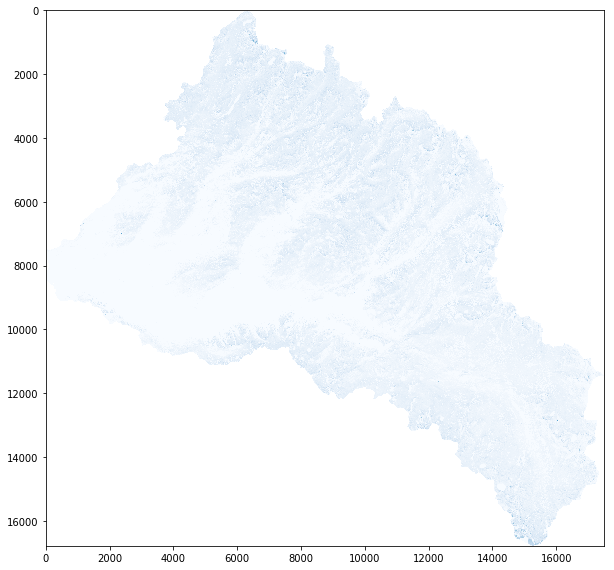

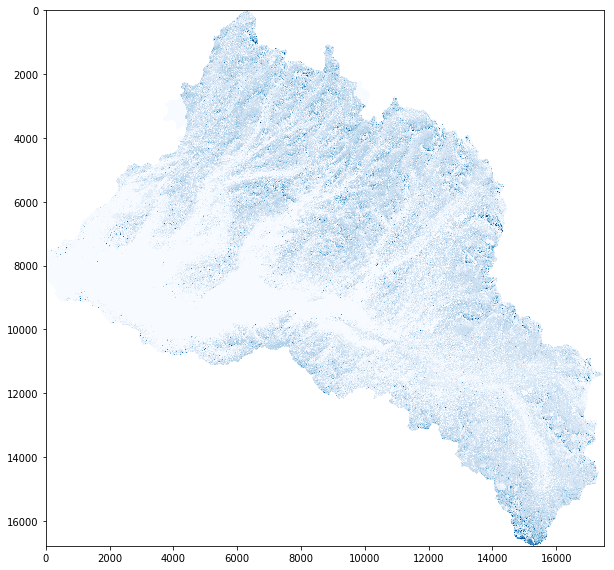

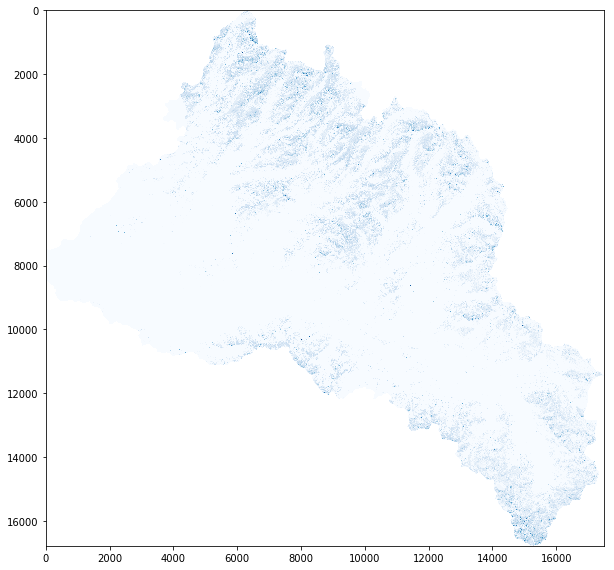

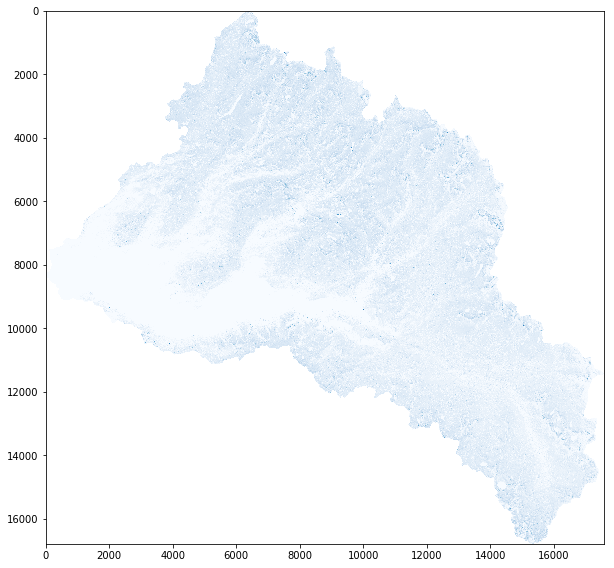

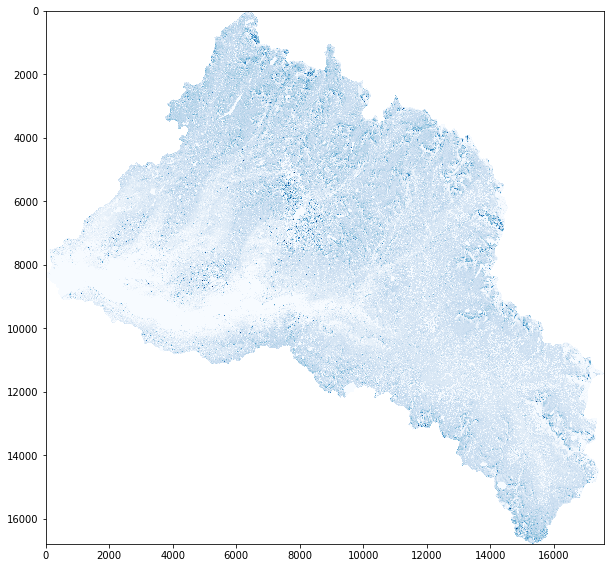

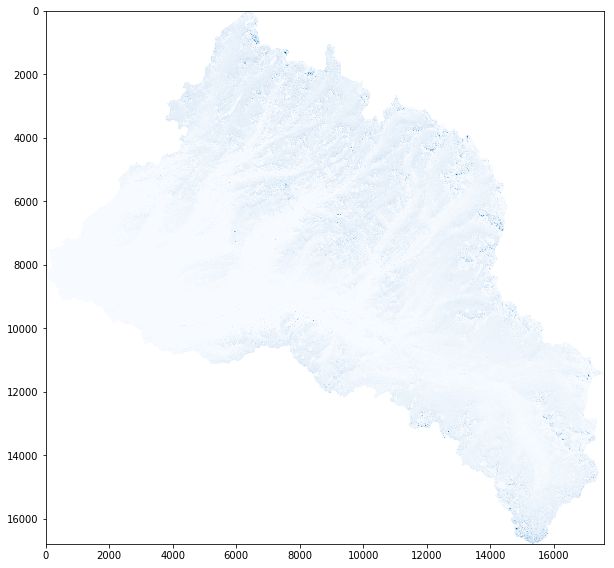

In [3]:
# clip raw lidar to Tuolumne shapefile, rasterio

start = 2013
end = 2018
yrs = range(start, end+1)
z=0

flist = glob.glob(path + '/*.tif')

for i,f in enumerate(sorted(flist)):
#     print(i,f)    

    ''' open Tuolumne shapefile '''
    with fiona.open(shp, "r") as shapefile:
        geoms = [feature["geometry"] for feature in shapefile]
         
    ''' open lidar tifs
        crops to shapefile
        makes no data NANs '''
    with rasterio.open(f) as src:
        out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True, nodata=np.nan) # crops to Tuolumne shapefile
        out_image[out_image<0]=np.nan # removes any negatives
        out_meta = src.meta.copy()

    out_meta.update({"driver": "GTiff",
                     "height": out_image.shape[1],
                     "width": out_image.shape[2],
                     "transform": out_transform})
    
    ''' update meta data on cropped tifs '''
    with rasterio.open("tmp_out/mask.tif", "w", **out_meta) as dest:
        dest.write(out_image)

    ''' plot settings '''
#     fig = plt.figure(figsize=(10,10))
#     plt.imshow(out_image[0,:,:], cmap='Blues')
#     plt.show()

#     print('{}'.format(yrs[z]), out_image.shape)
    np.save('/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/clean/arr_{}'.format(yrs[z]), out_image)

    z+=1
    

In [4]:
# import random

# tmp = np.empty([3,4,4])
# print(type(tmp))
# # tmp = []

# for ix, item in enumerate(range(3)): 
#     print(item)
#     a = np.random.randn(3,4,4)
#     mask = np.random.choice([1, 0], a.shape, p=[.1, .9]).astype(bool)
#     a[mask] = np.nan
#     # print(a)
#     tmp = np.append(tmp[ix,:,:], a)
    
# print(tmp.shape)
# print(tmp)

# # test = 

# # for val in tmp: 
# # #     print(val)
# #     arr = np.append(a, np)

# # lst = []
# # for item in data: 


In [5]:
# t = np.empty([3,4,4])

# arr=np.random.rand(1,4,4)


# a = np.array((1,2,3))
# b = np.array((2,3,4))
# np.dstack((a,b))